<h3>  We import numpy for mathematical operations and matplotlib for plotting. We also import Axes3D to make 3D plots.</h3>

In [81]:
import numpy as np 
import matplotlib.pyplot as plt 
from mpl_toolkits.mplot3d import Axes3D
import pylab

<h3> The Lorenz system is a system of ODEs that arises in the study of complex systems. The system is very much sensitive to initial conditions such that a little deviation will drastically alter the result. This makes it difficult to make accurate predictions. <br/> <br/>
$
\begin{equation}
    \frac{dx}{dt} = \sigma(y-x) \\
    \frac{dy}{dt} = x(\rho - z) - y \\
    \frac{dz}{dt} = xy - \beta z
\end{equation}
$
</h3>

In [82]:
a = sigma = 10
b = rho = 28
c = beta = 8/3

x_dot = F = lambda x,y: a*(y-x)
y_dot = G = lambda x,y,z: x*(b-z) - y
z_dot = H = lambda x,y,z: x*y - c*z

<h3> h is our step size and N is our number of steps. </h3> 

In [83]:
h = 0.01
N = 10000

<h3> We create a list of x,y, and z values corresponding to our N but 
    mainly composed of zeros which will be updated later. </h3>

In [84]:
x = []
y = []
z = []

for i in range(N+1):
        
    x.append(0)
    y.append(0)
    z.append(0)

<h3> We define our initial values. </h3>

In [85]:
x[0] = 1
y[0] = 1
z[0] = 1


<h3> We then solve the ODE using fourth order Runge-Kutta. </h3>

In [86]:
for i in range(N):
    
    
    xk1 = h*F(x[i],y[i])
        
    xk2 = h*F(x[i]+(xk1*h/2),y[i]+(xk1*h/2))
        
    xk3 = h*F(x[i]+(xk2*h/2),y[i]+(xk2*h/2))
    
    xk4 = h*F(x[i]+(xk3*h),y[i]+(xk3*h))
        
    x[i+1] = x[i] + (1/6)*(xk1 + 2*xk2 + 2*xk3 +xk4) #new x value (iterated)
    
    yk1 = h*G(x[i],y[i],z[i])
        
    yk2 = h*G(x[i]+(yk1*h/2),y[i]+(yk1*h/2),z[i]+(yk1*h/2))
        
    yk3 = h*G(x[i]+(yk2*h/2),y[i]+(yk2*h/2),z[i]+(yk2*h/2))
    
    yk4 = h*G(x[i]+(yk3*h),y[i]+(yk3*h),z[i]+(yk3*h))
        
    y[i+1] = y[i] + (1/6)*(yk1 + 2*yk2 + 2*yk3 +yk4) #new y value (iterated)
    
    zk1 = h*H(x[i],y[i],z[i])
        
    zk2 = h*H(x[i]+(zk1*h/2),y[i]+(zk1*h/2),z[i]+(zk1*h/2))
        
    zk3 = h*H(x[i]+(zk2*h/2),y[i]+(zk2*h/2),z[i]+(zk2*h/2))
    
    zk4 = h*H(x[i]+(zk3*h),y[i]+(zk3*h),z[i]+(zk3*h))
        
    z[i+1] = z[i] + (1/6)*(zk1 + 2*zk2 + 2*zk3 +zk4) #new z value (iterated)

<h3> We make a 3D plot of our solution. </h3>

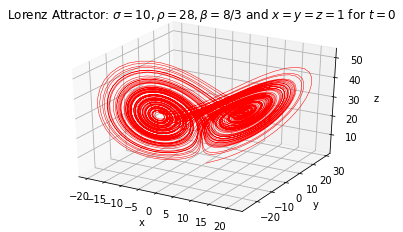

In [99]:
fig = plt.figure()
ax = plt.axes(projection='3d')

ax.plot(x, y, z, color = 'red', lw=0.5)
ax.set_xlabel("x")
ax.set_ylabel("y")
ax.set_zlabel("z")
ax.set_title(r'Lorenz Attractor: $\sigma = 10,\rho = 28, \beta = 8/3$ and $x=y=z=1$ for $t = 0$')

plt.show()
